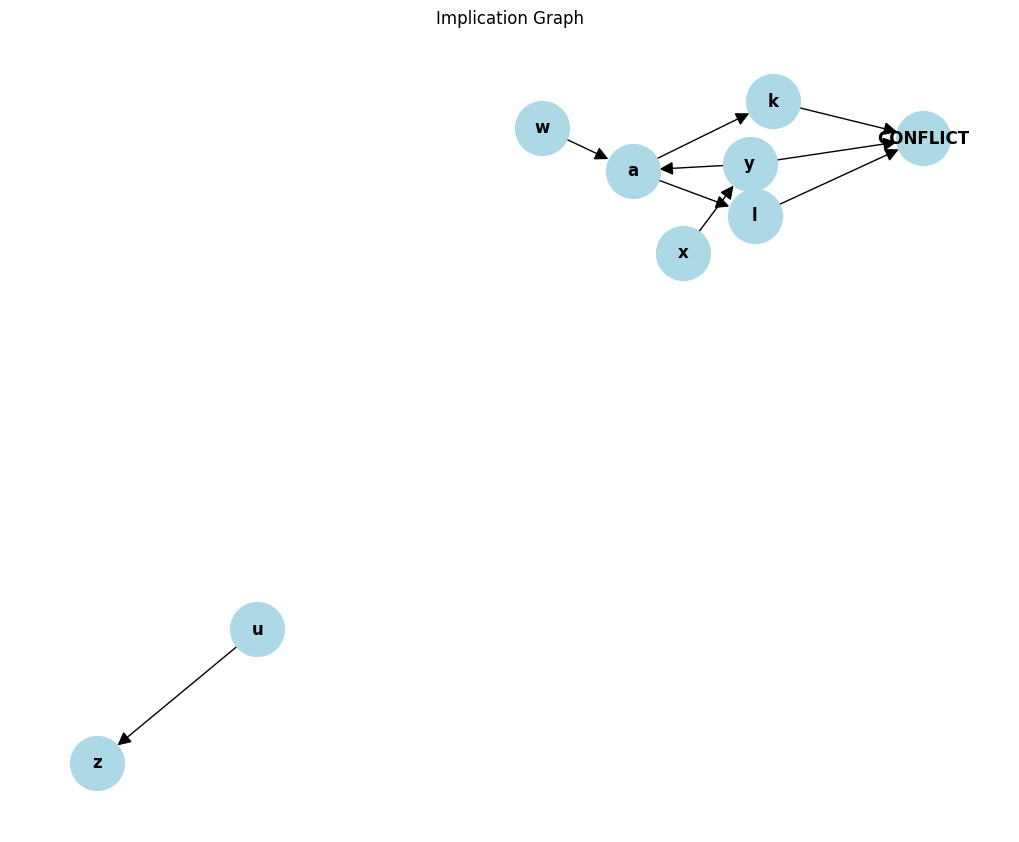

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def create_implication_graph(clauses, decisions):
    G = nx.DiGraph()
    
    # Track unit propagations
    assignments = {}
    for decision in decisions:
        assignments[decision] = True
        
        # Propagate until no more changes
        while True:
            new_assignment = False
            
            for clause in clauses:
                # Parse clause into literals
                lits = clause.split(' ∨ ')
                unassigned = [lit for lit in lits if lit.replace('¬', '') not in assignments]
                assigned = [lit for lit in lits if lit.replace('¬', '') in assignments]
                
                # Check if clause forces a unit propagation
                if all(is_false(lit, assignments) for lit in assigned) and len(unassigned) == 1:
                    lit = unassigned[0]
                    var = lit.replace('¬', '')
                    val = '¬' not in lit
                    
                    if var not in assignments:
                        assignments[var] = val
                        new_assignment = True
                        
                        # Add edge to graph
                        for alit in assigned:
                            avar = alit.replace('¬', '')
                            G.add_edge(avar, var)
            
            if not new_assignment:
                break
                
        # Check for conflicts
        for clause in clauses:
            lits = clause.split(' ∨ ')
            if all(is_false(lit, assignments) for lit in lits):
                # Found conflict - add conflicting nodes
                conflict_vars = [lit.replace('¬', '') for lit in lits]
                for var in conflict_vars:
                    G.add_edge(var, 'CONFLICT')
                return G
    
    return G

def is_false(lit, assignments):
    var = lit.replace('¬', '')
    if var not in assignments:
        return False
    return ('¬' in lit) == assignments[var]

# Example usage
clauses = [
    '¬x ∨ y',
    '¬u ∨ z',
    '¬y ∨ ¬w ∨ a',
    '¬a ∨ l',
    '¬a ∨ k',
    '¬y ∨ ¬l ∨ ¬k'
]
decisions = ['x', 'u', 'w']

G = create_implication_graph(clauses, decisions)

# Draw graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, arrowsize=20, font_size=12,
        font_weight='bold')
plt.title("Implication Graph")
plt.show()